# Introduction 
Hello once more, I am attempting linear regression this time so buckle up! Of course I want to use the league of legends dataset. Primarily because I am not done milking this for the memes but also due to the fact that I have not found another dataset that I like as much as this one. Especially since I do want to go into game development and design. So you are stuck with me. Forever. 

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install notebook

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

So, I simply initialized everything as one does. Though I know what you're asking. "Why are we revisiting this dataset?" Simple answer. I'm lazy. Also I can see whether or not there needs to be an improvement towards the total playtime of a ranked match. As much as we love to bash League players for their inability to shower, having their matches limited to a certain amount of time like other games do, is likely for the best. It will allow players to actually sit down and know how long a match will be and will likely increase their hygiene. 

It also allows for e-sports companies to have an easier time with planning out ad breaks and streaming matches. Which as much as we do bash the game, this is one of the staples for the e-sports community. 

Now, you may be asking me what linear regression is because I did import that from scikit-learning. Great question. Best way I can describe it is using continuous values to be able to predict outcomes. Which in this case will be determined by the time for the match; Yes, I could technically use this to actually predict if someone is going to win or lose based on the times and the buff but that is not why I write. No, I just want to see if there are some changes that could be made within the game. 

# Pre-Processing Data

Of course I have to clean up the code, process the information, and try to see if there are any stray variables. I plan to stick within the variables of the buffs and game duration to conclude information.

In [7]:
df = pd.read_csv("games.csv")

df['totalTowers'] = df['t1_towerKills'] + df['t2_towerKills']
df['totalInhibit'] = df['t1_inhibitorKills'] + df['t2_inhibitorKills']
df['totalDrag'] = df['t1_dragonKills'] + df['t2_dragonKills']
df['totalBaron'] = df['t1_baronKills'] + df['t2_baronKills']
df['totalHeralds'] = df['t1_riftHeraldKills'] + df['t2_riftHeraldKills']

So, what I am doing here is condensing the information given that I am looking at the information from both sets and trying to make a prediction. Which may seem like the rambles that your tarot card reader makes before they tell you that you are going to die due to a pebble on your leftmost brick in your basement but, it is fine. I am not that crazy, I hope. Anyway. Combining both values does allow for an easier range of values that can be checked in comparison to the game duration as my previous project was focused more on wins and losses. 

# Experiment 1

From here on I will be utilizing the mixed values of both teams to create a heatmap then followed by linear regression. 

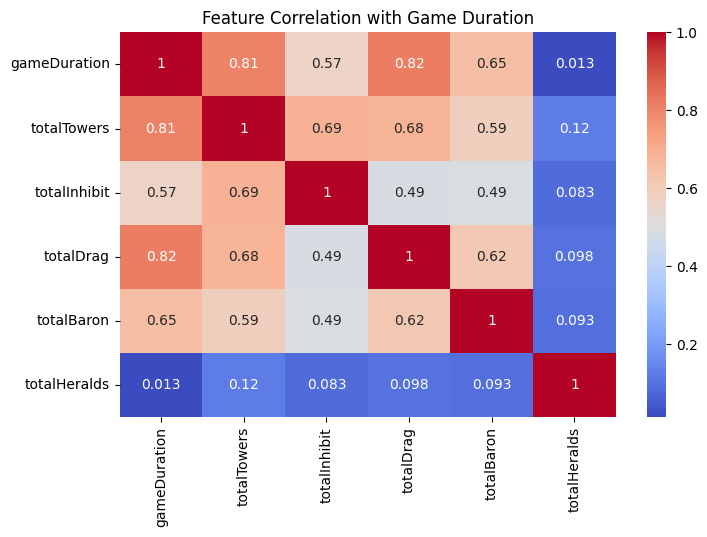

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['gameDuration', 'totalTowers', 'totalInhibit', 'totalDrag', 'totalBaron', 'totalHeralds']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Game Duration")
plt.show()

So with the heatmap done, we do have more of a visual display on everything. Better than my previous heatmap honestly, but we can conclude some things in line with the game duration, which similarly to my previous project, tower kills seem to be the thing that dictate a game the most. 

In [15]:
X = df[['totalTowers', 'totalInhibit', 'totalDrag', 'totalBaron', 'totalHeralds']]
y = df['gameDuration']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Experiment 1 rmse (in seconds): ", rmse)
print("Model Coefficents: ", model.coef_)
print("Intercept: ", model.intercept_)

Experiment 1 rmse (in seconds):  232.44218429201004
Model Coefficents:  [ 62.62531055  -3.95014453 185.6712396   86.19400818 -96.49802205]
Intercept:  597.5920635046755


So, that is a lot of values that I will not blame you if you do not understand. Honestly it is a miracle I can barely understand what I am doing. So the RMSE is essentially the margin of error in terms of time that can be pulled out, which is around four minutes, three minutes and fifty two seconds if you want to be specific. Of course certain things are not captured properly within these four minutes but aside from that margin of error, the rest of the information is gathered. 

For further context as I am sure that many of you likely did not read the wikis I had outlined in the resources prior. Not that I am blaming any of you, League of Legends is a hobby that not many sane people wish to get into, and any knowledge regarding it may as well be uranium. But first we go with the towers, which are spawned in at the begining of every game. Every tower kill extends the game by around sixty three seconds or a minute. As for inhibitors, which is in charge of preventing the spawn of steroid up'd minions, reduces the game time by around four seconds. Which ain't a fucking lot but hey four seconds is four seconds. Dragon kills add about one hundred and eighty six seconds to the game or about three minutes give or take. Which is insane given that dragons spawn in at the five minute mark and respawns every five minutes. Like no wonder players take forever to finish a match, every kill basically adds half the spawn rate of the dragon. There has got to be a minute to dragon index at this point.

Barons aren't as bad as they add about eighty seconds or a minute and twenty seconds. Given that they spawn at the twenty minute mark and only respawn every six minutes afterwards--which is a question onto itself--isn't so bad. The rift herald seems to be the only boss that actually reduces game time, which from what I can see, is the only boss that might not actually respawn unless I am mising something. But it reduces the game by about a minute and a half or ninty seven seconds. 

Why did I keep with seconds? Because I question my own sanity. 

Anyway, the intercept, which I will only give in minutes because I think I have tortured you all with the seconds. Is about ten minutes. Which is what a game length would be if you got like no buffs, which, RIP. Like honestly, if you manage to do everything without a buff or literally any inhibitor kills, which is strangely impossible given that you need to destroy the towers. Please play another game. Like for your own sanity.

# Experiment 2

So for this experiment I will be checking if the data was skewed in any sense, such as if team 1 was less likely to get dragon kills compared to team 2. I will also be comparing the weight of dragon kills in comparison to towers. 

In [16]:
df['diffTower'] = np.abs(df['t1_towerKills'] - df['t2_towerKills'])
df['diffInhibit'] = np.abs(df['t1_inhibitorKills'] - df['t2_inhibitorKills'])
df['diffDrag'] = np.abs(df['t1_dragonKills'] - df['t2_dragonKills'])
df['diffBaron'] = np.abs(df['t1_baronKills'] - df['t2_baronKills'])
df['diffHerald'] = np.abs(df['t1_riftHeraldKills'] - df['t2_riftHeraldKills'])

df['dragPerTower'] = df['totalDrag']/(df['totalTowers'] + 1)
df['baronTimeDrag'] = df['totalBaron'] * df['totalDrag']

df['y_log'] = np.log1p(df['gameDuration'])

features = ['totalTowers', 'totalInhibit', 'totalDrag', 'totalBaron', 'totalHeralds', 'diffTower', 'diffInhibit','diffDrag', 'diffBaron', 'diffHerald', 'dragPerTower', 'baronTimeDrag']

X = df[features].fillna(0)
y = df['y_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

rmse_seconds = np.sqrt(mean_squared_error(y_true, y_pred))

print("Experiment 2, RMSE: ", rmse_seconds)
print("Experiment 2, model coefficents: ", model.coef_)
print("Experiment 2, model intercept: ", model.intercept_)

Experiment 2, RMSE:  303.3318202760909
Experiment 2, model coefficents:  [ 1.14587234e-01 -3.34550377e-02 -1.31685245e-01  4.55799383e-02
 -1.80220420e-02  1.50613578e-02 -6.58284250e-04 -3.28895199e-03
 -1.06693018e-02 -1.80220420e-02  2.90379079e+00  6.12500396e-07]
Experiment 2, model intercept:  5.851885627845133


So, we see that the data is heavily skewed after all the changes that were made. Suddenly the margin of error has extended to about five minutes which can be a large jump given the circumstances. Aside from that, a lot of things that would marginally decrease the game time or increase it has now changed. Dragons used to add around three minutes but with the values and everything, it claims that dragomns reduce a second. Also the intercept should not be possible without the margin of error as it claims that without the margin of error, there is only around six seconds to complete a game. Which unless you are a chronic rage quitter at any second, that should not be a possibility. 

So skewing the data and adding the differences whenever team 1 or team 2 perform kills, and trying to check the weight of dragons in comparison to towers, we see that the data is drastically shifted.

# Experiment 3 

We are now extending to experiment three, which will focus on any potential overfitting. Which I could not blame the Scikit-Learning AI if it decided to just skip a couple thousand lines, this is over 50,000 lines of information. No, I am not typing that out and for our sanity, I will likely just move to placing actual numbers. Also, I will include a visual model for the third experiment as I feel like it would be better to be able to see the difference as I attempt to use some newer tools. Aside from adding newer tools.

In [ ]:
X = df[['totalTowers', 'totalInhibit', 'totalDrag', 'totalBaron', 'totalHeralds']]
y = df['gameDuration']

pipeline = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])

y_pred_cv = cross_val_predict(pipeline, X, y, cv=5)
rmse_cv = np.sqrt(mean_squared_error(y, y_pred_cv))
print("Experiment 3, RMSE: ", rmse_cv)

pipeline.fit(X, y)
print("Experiment 3, model coefficient: ", pipeline.named_steps['model'].coef_)
print("Experiemnt 3, intercept: ", pipeline.named_steps['model'].intercept_)

Experiment 3, RMSE:  229.25886429604105
Experiment 3, model coefficient:  [227.4491416   -4.09233097 228.47804931  65.40567313 -49.52697283]
Experiemnt 3, intercept:  1832.3628083122937


Alright, got the code running. We have returned to a normal RMSE and everything. Still going to be around 4 minutes for the RMSE. Though the code now suggests that towers add around four minutes to the game, 

# Resources 
https://www.kaggle.com/datasets/datasnaek/league-of-legends?select=games.csv 

https://wiki.leagueoflegends.com/en-us/Baron_Nashor

https://wiki.leagueoflegends.com/en-us/Dragon_pit

https://wiki.leagueoflegends.com/en-us/Rift_Herald